In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
from matplotlib import gridspec
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dhanushnarayananr/credit-card-fraud")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/dhanushnarayananr/credit-card-fraud/versions/1


In [12]:
data = pd.read_csv(path + "/card_transdata.csv")
data.head()
#Based on the top 5 rows of the data, we have 7 features that we will use to predict column 8 (whether or not the transaction is fraudulent)
#Some of the features are continuous while others are binary

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [13]:
data = data.sample(frac = 0.1, random_state = 48)
print(data.shape)
print(data.describe())
#This shows that we have 100,000 transactions within our dataset and provides descriptive stats on each feature

(100000, 8)
       distance_from_home  distance_from_last_transaction  \
count       100000.000000                   100000.000000   
mean            26.194117                        5.031568   
std             63.134567                       23.258183   
min              0.028734                        0.000419   
25%              3.875087                        0.298421   
50%              9.883333                        0.999076   
75%             25.319454                        3.389860   
max           3716.377730                     3437.278746   

       ratio_to_median_purchase_price  repeat_retailer      used_chip  \
count                   100000.000000    100000.000000  100000.000000   
mean                         1.832031         0.880390       0.351130   
std                          2.808113         0.324507       0.477326   
min                          0.007278         0.000000       0.000000   
25%                          0.476903         1.000000       0.000000   


In [18]:
Fraud = data[data['fraud'] == 1]
Valid = data[data['fraud'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['fraud'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['fraud'] == 0])))
#This shows us the proportion of fraudulent charges compared to valid charges

0.09442717681565468
Fraud Cases: 8628
Valid Transactions: 91372


In [20]:
Fraud.describe()
#This line will give us the descriptive stats on the different features when there is a fraudulent charge

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,8628.000000,8628.000000,8628.000000,8628.000000,8628.000000,8628.000000,8628.000000,8628.0
mean,64.998730,12.359623,6.113647,0.880737,0.252898,0.002782,0.945294,1.0
std,130.711666,44.091895,5.677876,0.324116,0.434698,0.052671,0.227418,0.0
min,0.047201,0.000728,0.032447,0.000000,0.000000,0.000000,0.000000,1.0
25%,4.642488,0.320456,3.868308,1.000000,0.000000,0.000000,1.000000,1.0
50%,15.133591,1.180615,5.138487,1.000000,0.000000,0.000000,1.000000,1.0
75%,93.087078,4.690209,7.443910,1.000000,1.000000,0.000000,1.000000,1.0
max,3695.070179,1313.602200,126.713701,1.000000,1.000000,1.000000,1.000000,1.0


In [21]:
Valid.describe()
#Just some general observations: We can see that valid transactions typically happen closer to home, closer to previous transactions,
#and with a closer ratio to the median purcahse price

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,91372.000000,91372.000000,91372.000000,91372.000000,91372.000000,91372.000000,91372.000000,91372.0
mean,22.529907,4.339600,1.427730,0.880357,0.360406,0.109990,0.623353,0.0
std,50.927159,20.072806,1.921385,0.324545,0.480121,0.312879,0.484548,0.0
min,0.028734,0.000419,0.007278,0.000000,0.000000,0.000000,0.000000,0.0
25%,3.824606,0.296629,0.450203,1.000000,0.000000,0.000000,0.000000,0.0
50%,9.619442,0.986615,0.917545,1.000000,0.000000,0.000000,1.000000,0.0
75%,23.875515,3.299912,1.793636,1.000000,1.000000,0.000000,1.000000,0.0
max,3716.377730,3437.278746,94.234761,1.000000,1.000000,1.000000,1.000000,0.0


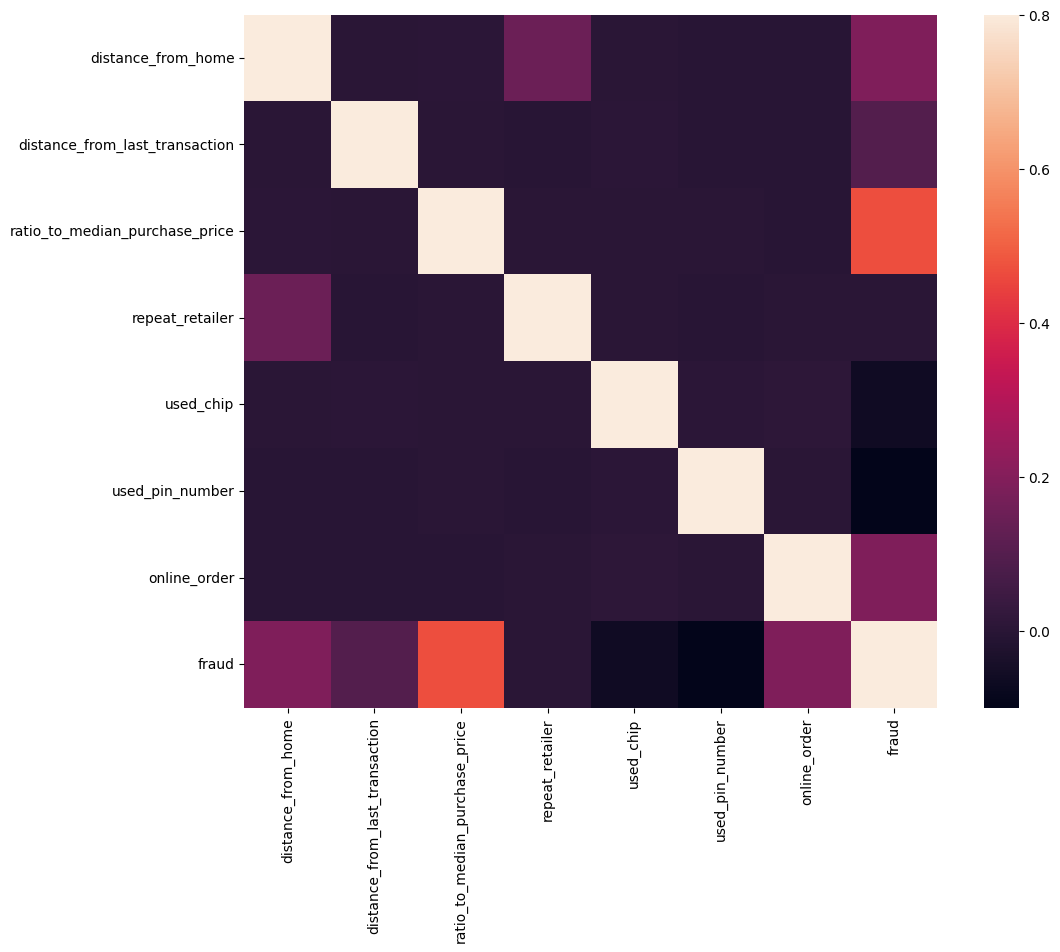

In [22]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()
#This is a heatmap for the correlation matrix, and we can see that there seems to be a semi-strong positive correlation between fraud and ratio to median purchase price

In [23]:
#Now we will divide the fraud column from the other features for our prediction model
X = data.drop(['fraud'], axis = 1)
Y = data["fraud"]
print(X.shape)
print(Y.shape)
XData = X.values
YData = Y.values

(100000, 7)
(100000,)


In [28]:
#This will allow 20% of the total dataset to be used for testing while the other 80% is used for training. Random state of 9 is just because I like the number
XTrain, XTest, YTrain, YTest = train_test_split(
    XData, YData, test_size = 0.2, random_state = 9
)

In [31]:
#This uses a Random Forest Classifier in order to predict whether the transactions were fraudulent
RFC = RandomForestClassifier()
RFC.fit(XTrain, YTrain)
YPred = RFC.predict(XTest)

In [32]:
#Now that we built the classifier, we are checking all of the evaluation parameters
n_outliers = len(fraud)
n_errors = (YPred != YTest).sum()

acc = accuracy_score(YTest, YPred)
prec = precision_score(YTest, YPred)
rec = recall_score(YTest, YPred)
f1 = f1_score(YTest, YPred)
mcc = matthews_corrcoef(YTest, YPred)

print("The accuracy is {}".format(acc))
print("The precision is {}".format(prec))
print("The recall is {}".format(rec))
print("The F1-score is {}".format(f1))
print("The COrrelation Coeficient is {}".format(mcc))


The accuracy is 0.9999
The precision is 1.0
The recall is 0.9988425925925926
The F1-score is 0.9994209612044007
The COrrelation Coeficient is 0.9993664363745172


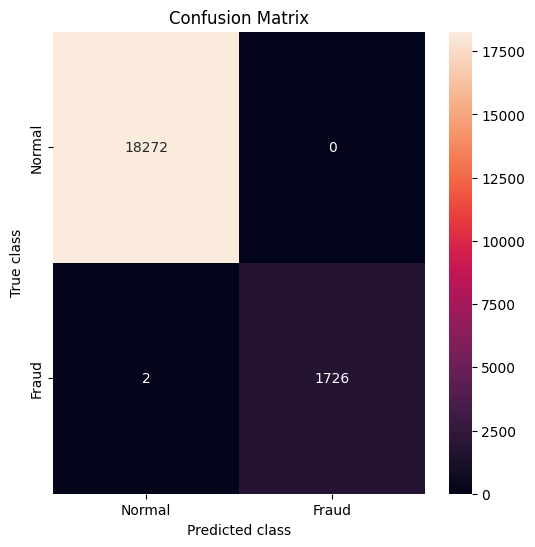

In [34]:
Labels = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(YTest, YPred)
plt.figure(figsize = (6, 6))
sns.heatmap(conf_matrix, xticklabels = Labels,
            yticklabels = Labels, annot = True, fmt = "d");
plt.title("Confusion Matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

#This Heatmap Confusion Matrix shows that our model is extremely accurate, only making a false prediction twice our of the 20,000 transactions in the test sample
#This could be a sign that our data was very clean to begin with and it may be beneficial to use messier data in the future to show data-cleaning skills